<a href="https://colab.research.google.com/github/desstroyy/Sentiment-Classification-of-Tweets/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_tweets3.csv to sentiment_tweets3.csv


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

In [ ]:
data = pd.read_csv('sentiment_tweets3.csv')

In [ ]:
# Split data into features (X) and labels (y)
X = data['message to examine']
y = data['label (depression result)']

In [ ]:
print(X[0])
print(y[0])

just had a real good moment i missssssssss him so much 
0


In [ ]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = text.lower()  # Convert text to lowercase
    return text

In [ ]:
# Apply text cleaning
X = X.apply(clean_text)
print(X[0])
print(y[0])

just had a real good moment i missssssssss him so much 
0


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Sample of X and y
print(X_train[2])
print(y_train[2])

comeagainjen httptwitpiccom2y2lx  httpwwwyoutubecomwatchvzogfqvh2me8 
0


In [ ]:
# TF-IDF vectorization - Gets a feature vector containing features for each word in the sentence
vectorizer = TfidfVectorizer()
X_train_f = vectorizer.fit_transform(X_train)
X_test_f = vectorizer.transform(X_test)

In [ ]:
print(X_train_f[0])
print(y_train[2])

  (0, 13015)	0.3215133065301706
  (0, 3526)	0.3054049620896709
  (0, 11087)	0.11281599127331055
  (0, 14432)	0.17896352904083032
  (0, 11662)	0.38517612126733314
  (0, 16155)	0.18913126693486762
  (0, 1692)	0.21527455338308502
  (0, 16404)	0.2650686063430437
  (0, 6166)	0.17286558341478808
  (0, 17492)	0.1855171341564889
  (0, 17517)	0.23003605475240832
  (0, 920)	0.10064914763633921
  (0, 11921)	0.21054455531012783
  (0, 12078)	0.25033016867764546
  (0, 6266)	0.3054049620896709
  (0, 16106)	0.0894759112300462
  (0, 6097)	0.2233484183112364
  (0, 15070)	0.13882454353514506
  (0, 8364)	0.23041435150674164
0


In [ ]:
# Train an SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_f, y_train)
# Predict on the test set
svm_test_predictions = svm_classifier.predict(X_test_f)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, svm_test_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.989983844911147


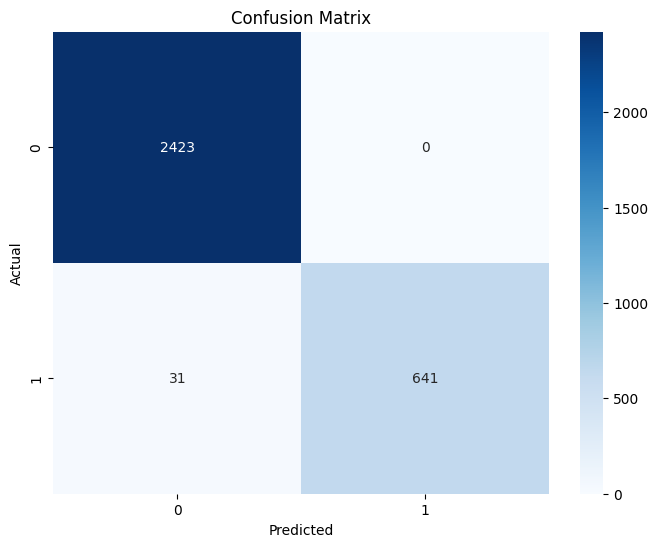

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
class_report = classification_report(y_test, svm_test_predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2423
           1       1.00      0.95      0.98       672

    accuracy                           0.99      3095
   macro avg       0.99      0.98      0.99      3095
weighted avg       0.99      0.99      0.99      3095



In [ ]:
# Create a Word Cloud for positive and negative sentiments
positive_text = ' '.join(X[y == 0])
negative_text = ' '.join(X[y == 1])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

In [ ]:
#Print sample positive and negative sentiment texts
print(positive_text)
print(negative_text)

just had a real good moment i missssssssss him so much  is reading manga  httpplurkcompmzp1e comeagainjen httptwitpiccom2y2lx  httpwwwyoutubecomwatchvzogfqvh2me8  lapcat need to send em to my accountant tomorrow oddly i wasnt even referring to my taxes those are supporting evidence though  add me on myspace  myspacecomlookthunder so sleepy good times tonight though  silkcharm re nbn as someone already said does fiber to the home mean we will all at least be regular now  23 or 24ï½c possible today nice  nite twitterville  workout in the am  ciao dananner night darlin  sweet dreams to you  good morning everybody  finally i just created my wordpress blog theres already a blog up on the seattle coffee community   httptinyurlcomc5uufd kisha they cnt get over u til they get out frm under u just remember ur on top  nicolerichie yes i remember that band it was awesome will you please reply  i really love reflections and shadows  blueaero ooo its fantasy  i like fantasy novels   will check it o

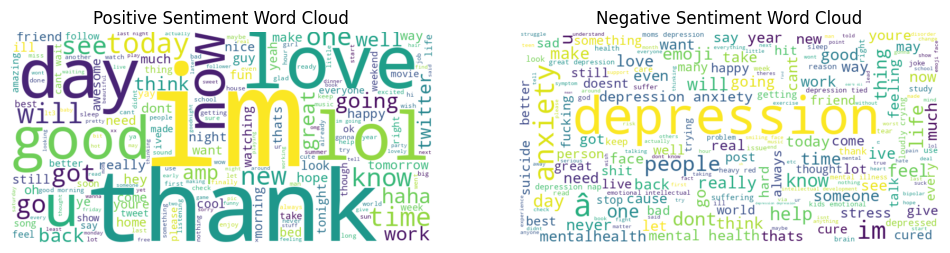

In [ ]:
# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.subplot(122)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()
